### Exercise
What if we wanted to approximate a different function $f$ with MLP's?  Consider the functions $f_{1}\left(x\right) = x\sin\left(x\right)$ and $f_{2}\left(x\right) = \left|x\right|$.  Can you create a network that can represent these functions?

***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7298631492230090463
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3211018240
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14646907252779081586
physical_device_desc: "device: 0, name: GeForce GTX 965M, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


## $f_{1}\left(x\right) = x\sin\left(x\right)$

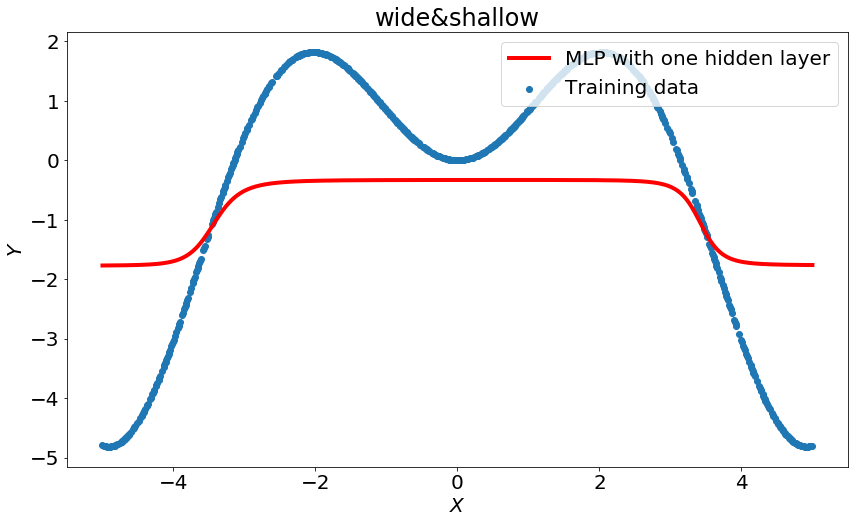

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x*np.sin(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 4 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid'))
# model.add(layers.Dense(H, input_dim=input_dim, 
#                 kernel_initializer='normal', 
#                 activation='relu'))
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='softmax')) 
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid'))
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('wide&shallow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

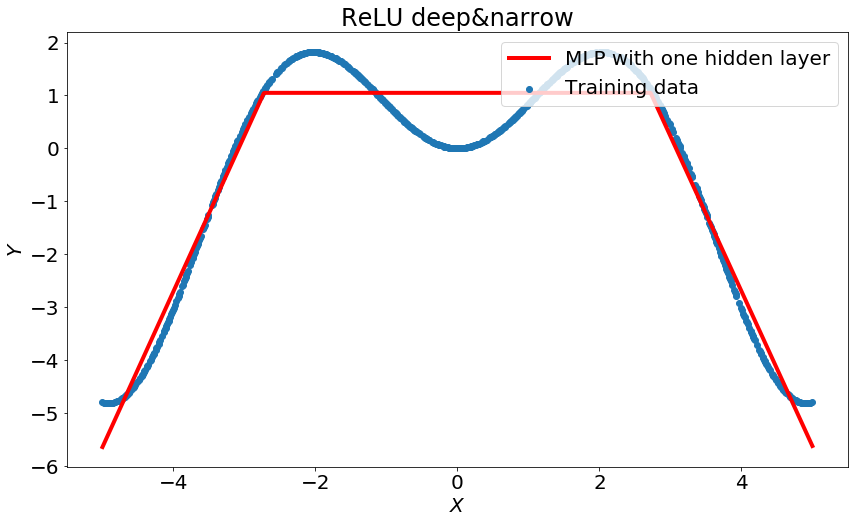

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x*np.sin(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 30 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 

# layer output
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('ReLU deep&narrow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

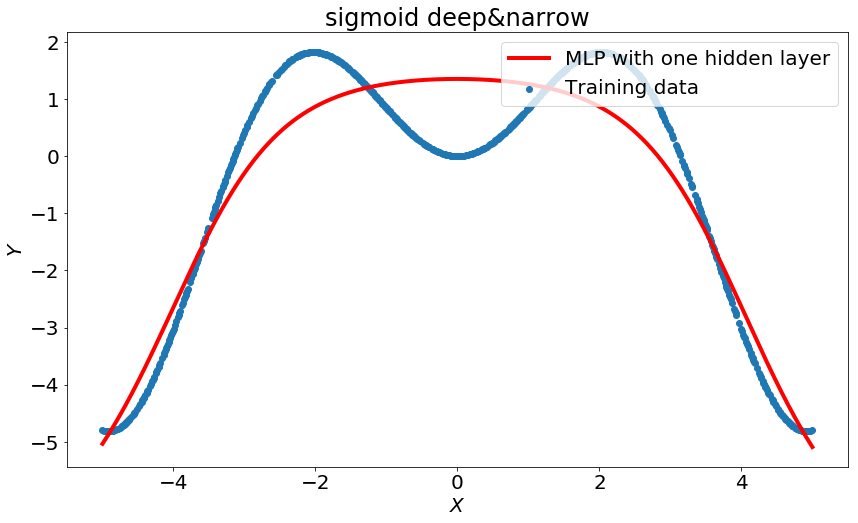

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x*np.sin(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 30 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 

# layer output
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('sigmoid deep&narrow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

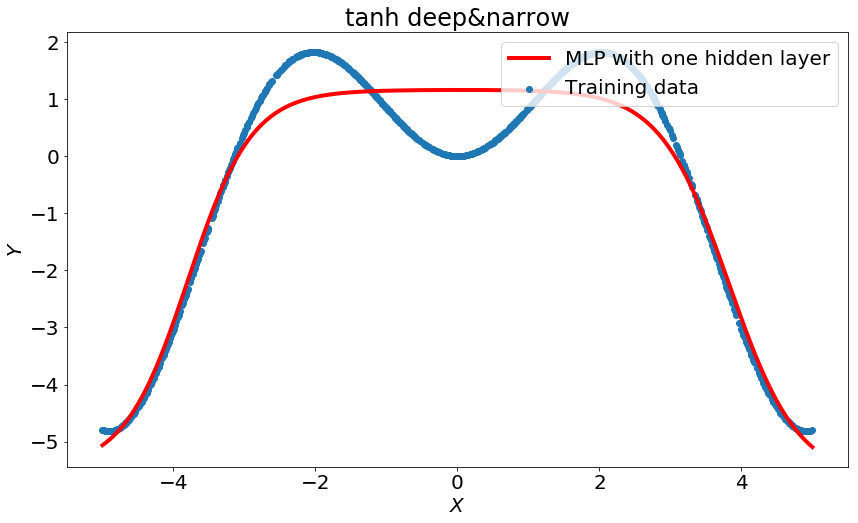

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x*np.sin(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 30 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 

# layer output
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('tanh deep&narrow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

## $f_{2}\left(x\right) = \left|x\right|$

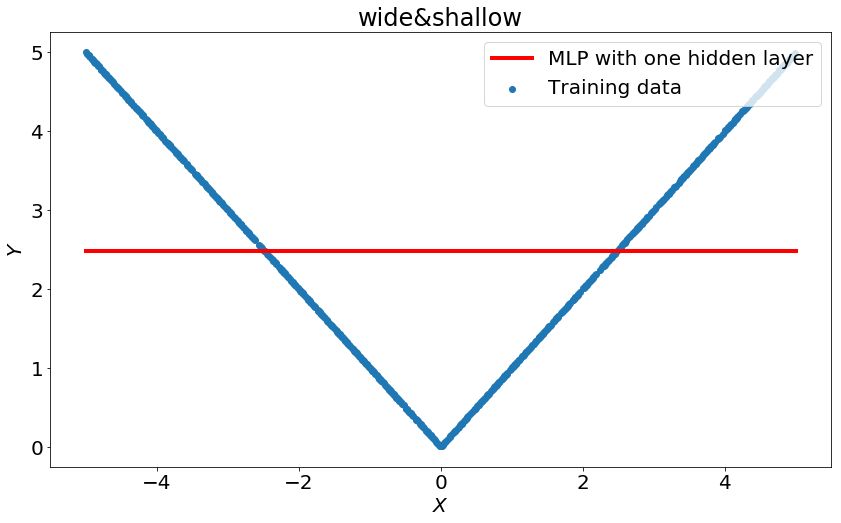

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.abs(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 4 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid'))
# model.add(layers.Dense(H, input_dim=input_dim, 
#                 kernel_initializer='normal', 
#                 activation='relu'))
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='softmax')) 
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid'))
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('wide&shallow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

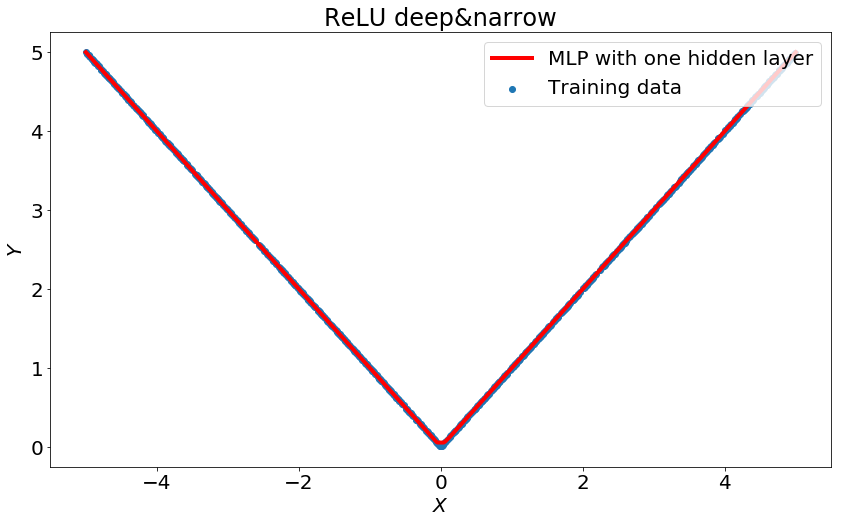

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.abs(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 30 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 

# layer output
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('ReLU deep&narrow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

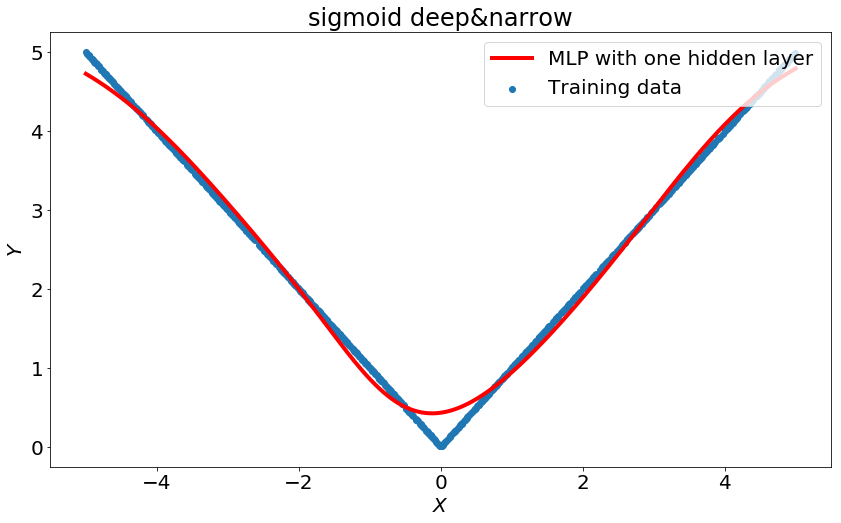

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.abs(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 30 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 

# layer output
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('sigmoid deep&narrow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

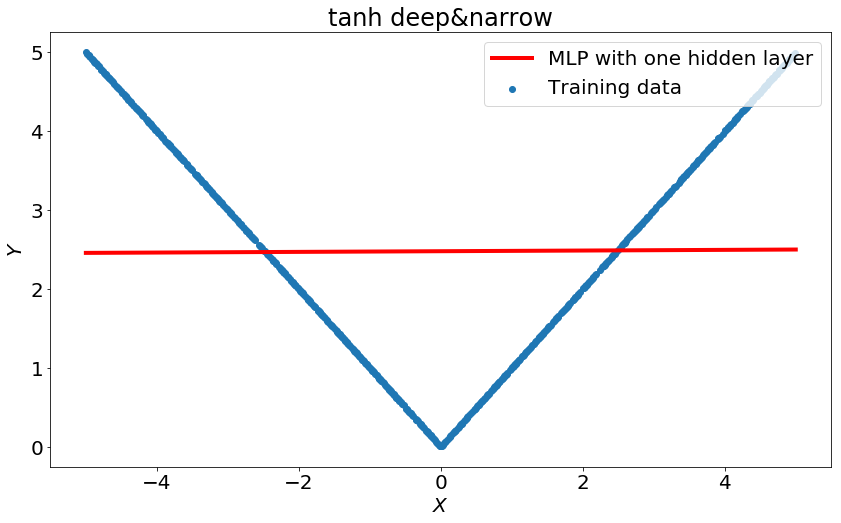

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.abs(x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

H = 20 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 

# layer output
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('tanh deep&narrow', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()